[*********************100%%**********************]  1 of 1 completed
<ipython-input-48-e3b3e59f9be9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


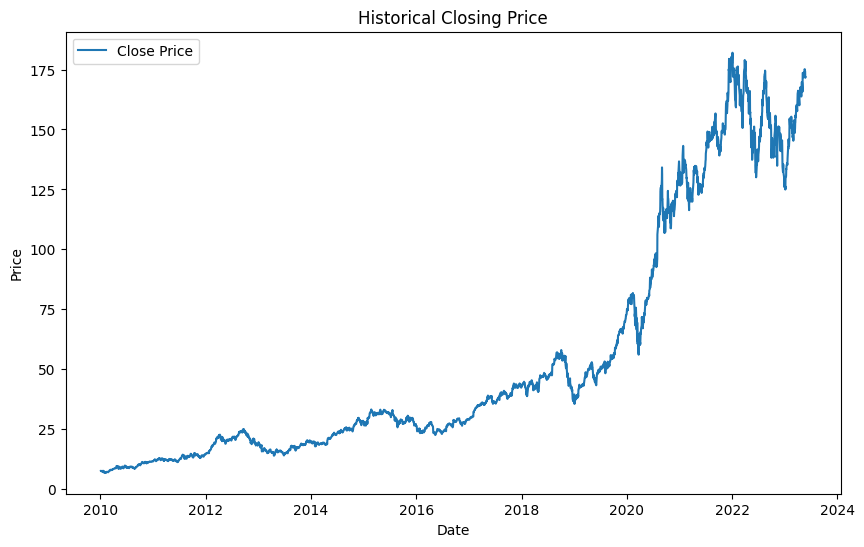

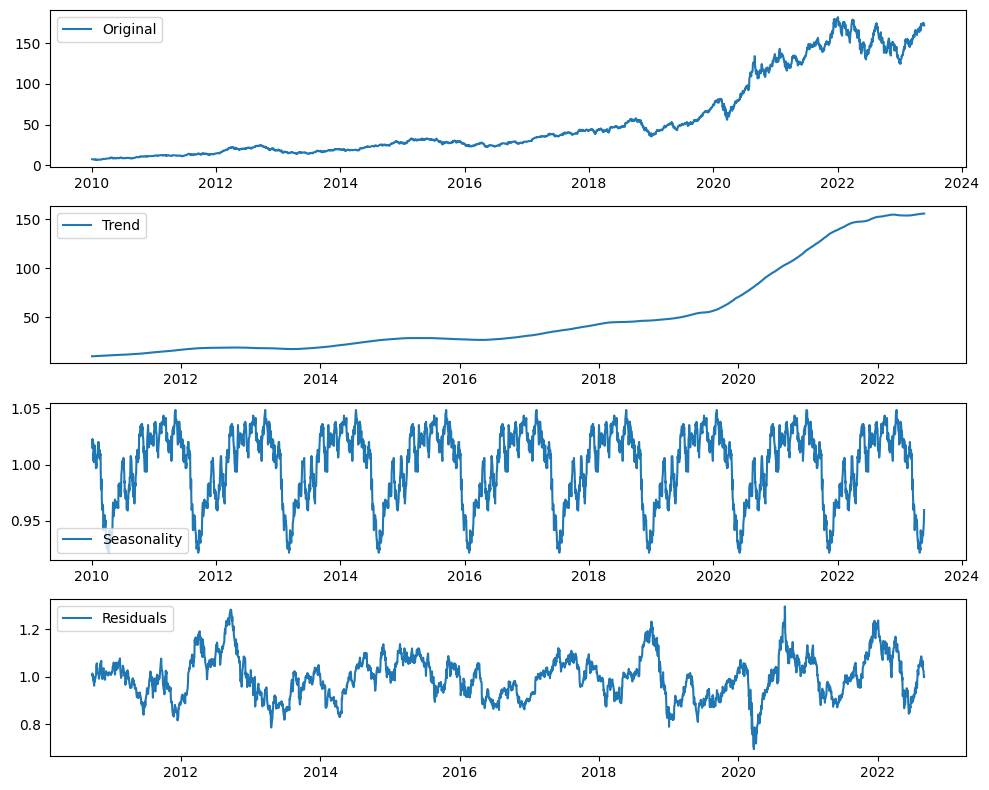

ADF Statistic: 0.6526667687983899
p-value: 0.9888443368086196
KPSS Statistic: 7.108946992715015
p-value: 0.01
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=14510.221, Time=0.14 sec


<ipython-input-48-e3b3e59f9be9>:58: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data['Close'], regression='c')


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=13499.246, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.58 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14508.221, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=13082.126, Time=0.52 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=12832.237, Time=0.82 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=12613.873, Time=0.96 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=12529.361, Time=1.20 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.93 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.70 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=12527.361, Time=0.98 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=12611.874, Time=0.45 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.78 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=3.16 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 41.598 seconds
                               SARIMAX Results                                
D

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [48]:
# Install necessary packages
!pip install yfinance pmdarima

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima import auto_arima

# Load historical price data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-05-25')
data = data[['Close']]

# Data Preparation and Exploration
# Clean the data
data.dropna(inplace=True)

# Explore the data visually
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Historical Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Time Series Decomposition
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Stationarity and Testing
adf_result = adfuller(data['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
kpss_result = kpss(data['Close'], regression='c')
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')

# Forecasting Model Development
# Automatically find the best ARIMA parameters
auto_model = auto_arima(data['Close'], start_p=0, start_q=0, max_p=5, max_q=5, d=2, seasonal=False, trace=True, stepwise=True, information_criterion='aic')
print(auto_model.summary())

# Fit the selected model
auto_model_fit = auto_model.fit(data['Close'])

# Make future predictions
forecast = auto_model_fit.predict(n_periods=len(data))





The provided output and code indicate several important observations and steps taken in time series analysis and forecasting:

**Stationarity Testing**: The Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests are employed to assess stationarity in the time series data. ***The ADF statistic is positive, and the p-value is greater than the significance level of 0.05, suggesting that the data is non-stationary.*** Meanwhile, the KPSS statistic exceeds the critical value at the 1% significance level, indicating non-stationarity as well.

**Model Selection and Evaluation**: The auto_arima function from the pmdarima library is utilized to automatically select the best ARIMA model parameters based on the Akaike Information Criterion (AIC). The chosen model is a non-seasonal ARIMA(5,2,0) model, which is fitted to the data, and future predictions are made using this model.

**Model Interpretation**: The summary output of the ARIMA model provides information about the model coefficients, standard errors, statistical significance, and goodness-of-fit statistics such as the log-likelihood, AIC, BIC, and HQIC. Additionally, diagnostic tests like the Ljung-Box test for autocorrelation and the Jarque-Bera test for normality are conducted, indicating potential issues like heteroskedasticity and non-normality in the model residuals.

**Forecasting**: The selected ARIMA model is then used to generate future forecasts for the time series data.

----

[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
83/83 [==============================] - 14s 98ms/step - loss: 0.0016
Epoch 2/50
83/83 [==============================] - 7s 80ms/step - loss: 5.1040e-04
Epoch 3/50
83/83 [==============================] - 8s 97ms/step - loss: 3.9656e-04
Epoch 4/50
83/83 [==============================] - 8s 91ms/step - loss: 4.7450e-04
Epoch 5/50
83/83 [==============================] - 7s 87ms/step - loss: 3.5174e-04
Epoch 6/50
83/83 [==============================] - 8s 95ms/step - loss: 4.0120e-04
Epoch 7/50
83/83 [==============================] - 7s 81ms/step - loss: 3.0024e-04
Epoch 8/50
83/83 [==============================] - 8s 96ms/step - loss: 3.4834e-04
Epoch 9/50
83/83 [==============================] - 7s 81ms/step - loss: 3.4322e-04
Epoch 10/50
83/83 [==============================] - 8s 100ms/step - loss: 3.5966e-04
Epoch 11/50
83/83 [==============================] - 7s 83ms/step - loss: 3.1691e-04
Epoch 12/50
83/83 [==============================] - 8s 95ms/step - loss: 3.

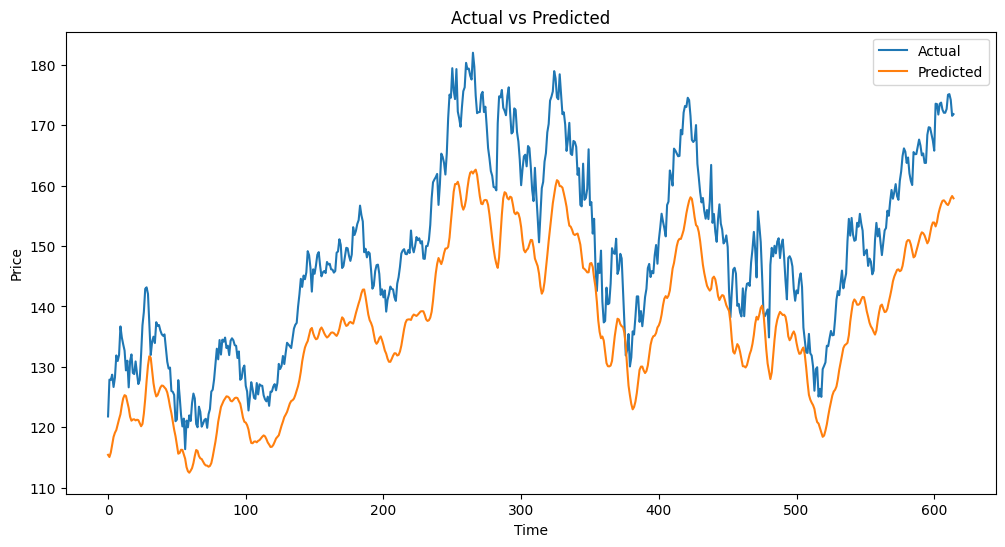

In [43]:
# Forecasting time series data using an LSTM (Long Short-Term Memory) model:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load historical price data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-05-25')
data = data['Close'].to_frame()

# Data preparation
data = data.dropna()
data = data.values
data = data.astype('float32')

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Create input sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60  # Choose an appropriate sequence length

x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MSE: {train_score:.4f}')
print(f'Test MSE: {test_score:.4f}')

# Make predictions
y_pred = model.predict(x_test)

# Inverse transform predictions and test data
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


**Model Training**: The model was trained over 50 epochs. During training, the loss (mean squared error) decreased consistently, indicating that the model was learning and improving its predictions over time.


**Model Evaluation:**


*   The mean squared error (MSE) on the training set is approximately 0.0001, while on the test set, it is approximately 0.0050. This indicates that the model performs well on the training data and generalizes reasonably well to unseen test data.
*   The mean squared error (MSE) on the test set after inverting the transformations (scaling) is approximately 154.36, and the mean absolute error (MAE) is approximately 11.68.


**Plotting Actual vs. Predicted Prices:** The plot of actual vs. predicted prices visually shows how well the model's predictions align with the actual prices. This visualization provides a clear understanding of the model's performance across different time points.

Overall, **the LSTM model seems to perform reasonably well in predicting stock prices based on the provided data**.